In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SlotMachine:
    def __init__(self, n, p, value):
        self.id = n
        self.p = p
        self.value = value
    
    def pull_bandit(self) -> int:
        result = random.random()

        if(result <= self.p):
            return self.value
        else:
            return 0

In [3]:
slot_machines_data = [
    {"n": 0, "p": 0.05, "value": 100},
    {"n": 1, "p": 0.10, "value": 50},
    {"n": 2, "p": 0.15, "value": 30},
    {"n": 3, "p": 0.03, "value": 500},
    {"n": 4, "p": 0.08, "value": 80},
    {"n": 5, "p": 0.12, "value": 40},
    {"n": 6, "p": 0.07, "value": 70},
    {"n": 7, "p": 0.06, "value": 60},
    {"n": 8, "p": 0.09, "value": 90},
    {"n": 9, "p": 0.11, "value": 110}
]

slot_machines = []
for sm in slot_machines_data:
    slot_machines.append(SlotMachine(sm['n'], sm['p'], sm['value']))

In [4]:
#calculando o prêmio do agente por jogar numa única slot machine
agent_prizes = []

for i in range(100):
    prize = 0
    for i in range(20):
        prize += slot_machines[0].pull_bandit()
    agent_prizes.append(prize)

In [5]:
agent_prizes = np.array(agent_prizes)
average_value = agent_prizes.mean()

print(average_value)

103.0


Text(0.5, 1.0, 'Quanto nosso agente ganhou')

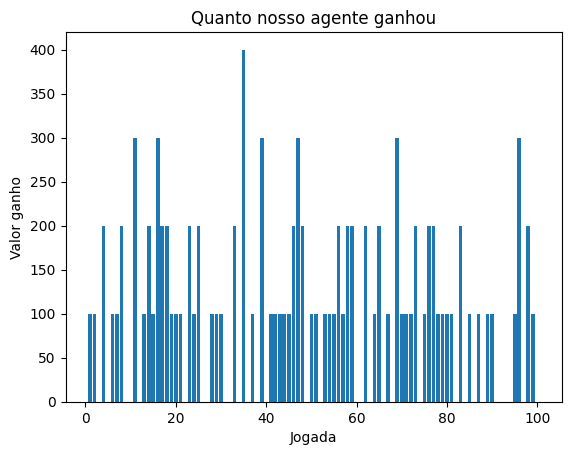

In [6]:
plt.bar([i+1 for i in range(len(agent_prizes))], agent_prizes)
plt.ylabel("Valor ganho")
plt.xlabel("Jogada")
plt.title("Quanto nosso agente ganhou")

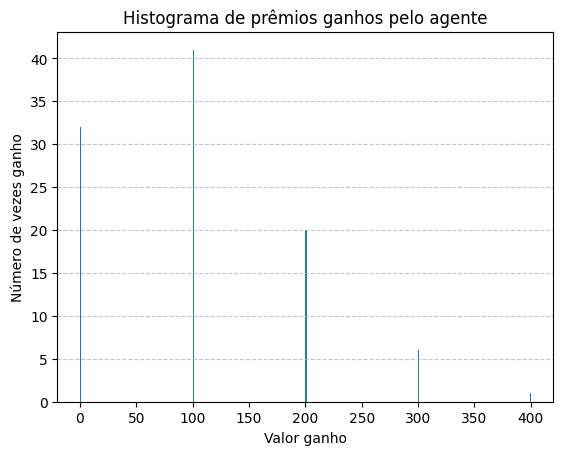

In [7]:
# Crie um histograma para contar a frequência dos valores ganhos pelo agente
plt.hist(agent_prizes, bins=range(min(agent_prizes), max(agent_prizes) + 1))
plt.ylabel("Número de vezes ganho")
plt.xlabel("Valor ganho")
plt.title("Histograma de prêmios ganhos pelo agente")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona linhas de grade no eixo y
plt.show()

In [8]:
class Agent:
    def __init__(self, bandits_list, epsilon):
        self.epsilon = epsilon
        self.bandits_list = bandits_list
        self.best_bandit = None
        self.best_reward = 0 #a que tem o maior valor/chance
        self.bandits_data = []
        for bandit in bandits_list:
            self.bandits_data.append({"id":bandit.id, "rewards":[], "mean":0})

    def pull_bandit(self, bandit : SlotMachine):
        for bandit_element in self.bandits_data:
            if(bandit_element['id'] == bandit.id):
                reward = bandit.pull_bandit()
                bandit_element['rewards'].append(reward)
                
                bandit_element['mean'] = sum(bandit_element['rewards'])/len(bandit_element['rewards'])
                if(bandit_element['mean'] > self.best_reward):
                    self.best_bandit = bandit
                    self.best_reward = bandit_element['mean']
                if(self.best_bandit != None):
                    if(bandit_element['id'] == self.best_bandit.id):
                        #se a recompensa não aumentou e eu tô atualizando o "melhor" pode significar que ela baixou para ele
                        #Preciso checar agora qual o melhor de todos
                        best_bandit = max(self.bandits_data, key=lambda x: x['mean'])
                        self.best_reward = best_bandit['mean']
                        self.best_bandit = next(bandit for bandit in self.bandits_list if bandit.id == best_bandit['id'])

                break
        return reward

    def explore(self):
        bandit = random.choice(self.bandits_list)
        self.pull_bandit(bandit)

    def exploit(self):
        if(self.best_bandit != None):
            self.pull_bandit(self.best_bandit)

    def episilon_greedy(self):
        if(random.random() > self.epsilon and self.best_bandit): #Enquanto ele não tiver um melhor ele não exploita
            self.exploit()
        else:
            self.explore()

agent = Agent(slot_machines, 0.3)

In [9]:
for i in range(8000):
    agent.episilon_greedy()

In [10]:
agent.best_bandit.id

9

In [11]:
for data in agent.bandits_data:
    recompensa_esperada = 0
    if(len(data['rewards']) != 0):
        recompensa_esperada = sum(data['rewards'])/len(data['rewards'])
    print(f"bandit de id: {data['id']} tem recompensa esperada: {recompensa_esperada}")
    # print(f"bandit de id: {data['id']} =====> {data['mean']}")

bandit de id: 0 tem recompensa esperada: 6.177606177606178
bandit de id: 1 tem recompensa esperada: 5.555555555555555
bandit de id: 2 tem recompensa esperada: 2.869565217391304
bandit de id: 3 tem recompensa esperada: 4.424778761061947
bandit de id: 4 tem recompensa esperada: 6.896551724137931
bandit de id: 5 tem recompensa esperada: 5.517241379310345
bandit de id: 6 tem recompensa esperada: 5.61822125813449
bandit de id: 7 tem recompensa esperada: 3.658536585365854
bandit de id: 8 tem recompensa esperada: 8.695345557122709
bandit de id: 9 tem recompensa esperada: 11.209547854028001


In [166]:
for bandit in agent.bandits_data:
    print(bandit['rewards'])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 100, 0, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [167]:
# for data in agent.bandits_data:
#     recompensa_esperada = 0
#     if(data['number_of_pulls'] != 0):
#         recompensa_esperada = data['number_of_successes'] * data['reward_value'] / data['number_of_pulls']
#     print(f"bandit de id: {data['id']} foi puxado {data['number_of_pulls']} e teve {data['number_of_successes']} sucessos com recompensa {data['reward_value']}, a recompensa esperada por puxar é: {recompensa_esperada}")